In [0]:
#########     preparation block       #########
#   install mne package & upload eeg data files
###############################################
!pip install mne

from google.colab import files
uploaded = files.upload()

     |████████████████████████████████| 6.6MB 433kB/s 


Saving EEG_Data_03.eeg to EEG_Data_03.eeg
Saving EEG_Data_03.vmrk to EEG_Data_03.vmrk
Saving EEG_Data_03.vhdr to EEG_Data_03.vhdr


In [0]:
###   data loading block   ###

import sys
import mne
import matplotlib.pyplot as plt
import time
plt.style.use('default')
import scipy.io as sio
import numpy as np
from scipy import signal
from scipy import fft
import array as arr
NumOfChannels = 70
vhdr_file = 'EEG_Data_03.vhdr'
raw_data = mne.io.read_raw_brainvision(vhdr_file, misc='auto', scale=1000000.0)     
vec = (raw_data.get_data(start=0,stop=20000))

Extracting parameters from EEG_Data_03.vhdr...
Setting channel info structure...


<ipython-input-4-19e6b291c944>:14: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  raw_data = mne.io.read_raw_brainvision(vhdr_file, misc='auto', scale=1000000.0)


In [0]:
#####   data filtering block  #####
zi_notch=[]
zi_band=[]
welch_1=18
welch_2=24
idx_topo=np.array(range(64))
freq_1_y=20
freq_2_y=20
order = 2
fs = 500
lowcut = 10
highcut = 40
nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq
      
f0 = 50.0  # Frequency to be removed from signal (Hz)
Q = 30.0  # Quality factor
        #Design notch filter
        
b_notch, a_notch = signal.iirnotch(f0, Q, fs)
b_band, a_band = signal.butter(order, [low, high], btype='band')
#zi_notch = signal.lfilter_zi(b_notch,a_notch)
#zi_band = signal.lfilter_zi(b_band,a_band)
for i in range(70):
  zi_notch.append(signal.lfilter_zi(b_notch, a_notch))
  zi_band.append(signal.lfilter_zi(b_band, a_band))
def Filter_data(data, a_notch,b_notch,a_band,b_band,zi_notch,zi_band):
        #  FILTERING DATA           
        # =============================================================================
       data, zi_notch = signal.lfilter(b_notch, a_notch, data, axis=1, zi=zi_notch)
       data, zi_band = signal.lfilter(b_band, a_band, data, axis=1, zi=zi_band)
       #zi_notch = zf_notch
       #zi_band = zf_band
       return data, zi_notch,zi_band


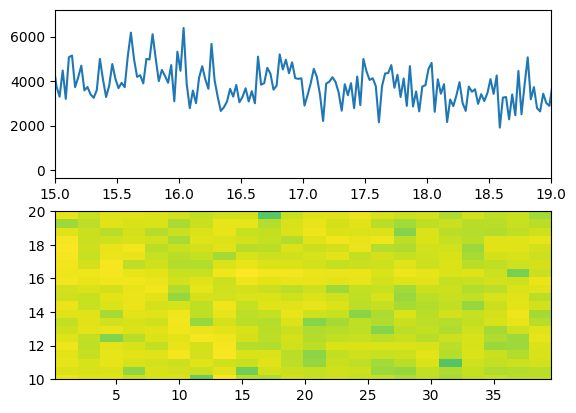

In [0]:
####   spectrogram display   ###
#filt,zi_notch = signal.lfilter(b_notch, a_notch, vec,zi=zi_notch)
#filt,zi_band = signal.lfilter(b_band, a_band, filt,zi=zi_band)

filt,zi_notch,zi_band = Filter_data(vec,a_notch,b_notch,a_band,b_band,zi_notch,zi_band)
f_1, t_1, spectro1  = signal.spectrogram(filt[1],nperseg=1024)
fig, (ax1,ax2) = plt.subplots(2)
freqs1 = fft.fftshift(fft.fft(filt[1]))

spec,f,t,im = ax2.specgram(filt[1],NFFT=1024,Fs=500)
ax1.plot(np.linspace(-fs/2, fs/2, 20000),abs(freqs1))
ax2.axes.set_ylim(bottom=10,top=20)
ax1.axes.set_xlim(left=15,right=19)
plt.show()

In [0]:
np.size(spectro1)
t_1

array([  512.,  1408.,  2304.,  3200.,  4096.,  4992.,  5888.,  6784.,
        7680.,  8576.,  9472., 10368., 11264., 12160., 13056., 13952.,
       14848., 15744., 16640., 17536., 18432., 19328.])

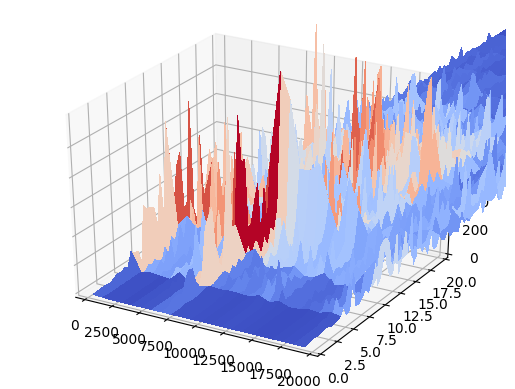

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(t_1, f_1*fs)
surf = ax.plot_surface(X, Y, spectro1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_xlim3d(left=0,right=15000)
ax.set_ylim3d(bottom=0,top=20)
plt.show()